In [57]:
"""
@authors={'Chandra Mani Sharma', 'Kapil Tomar'}
About dataset: There are following columns in the dataset
id: insignificant, remove this
gender: Categorical, Male/Female
age:
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke: 1 or 0
"""



"\n@authors={'Chandra Mani Sharma', 'Kapil Tomar'}\nAbout dataset: There are following columns in the dataset\nid: insignificant, remove this\ngender: Categorical, Male/Female\nage:\nhypertension\nheart_disease\never_married\nwork_type\nResidence_type\navg_glucose_level\nbmi\nsmoking_status\nstroke: 1 or 0\n"

In [58]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# EDA & Visualization on Data

In [59]:
data=pd.read_csv("data.csv")
#df.describe().to_csv("description.csv")
#print(df.head())

In [60]:
#View the whole data
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [61]:
# Statistical analysis on numerical values
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [62]:
#Concise summary about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [63]:
# Checking the data types of each column
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [64]:
# PrintChecking total missing values for overall dataset
print(data.isna().sum().sum())

201


In [67]:
# Checking missing values in every column
# print(data.columns)
print(data.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [69]:
#Findng the correlation in data set
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


(array([434., 362., 440., 484., 597., 583., 686., 559., 407., 558.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

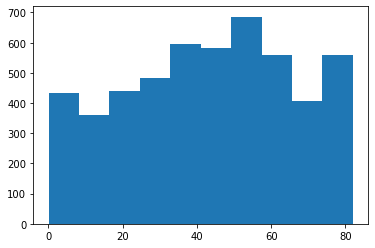

In [70]:
#sns.distplot(data.age)
plt.hist(data.age)

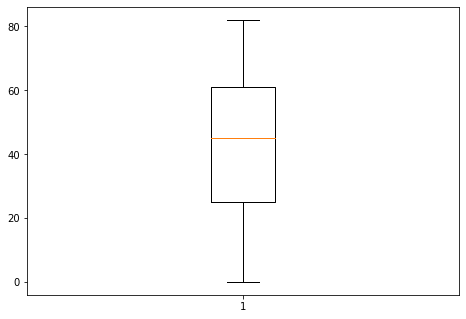

In [71]:
# Create the boxplot for age
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
ax.boxplot([data["age"]])
plt.show()


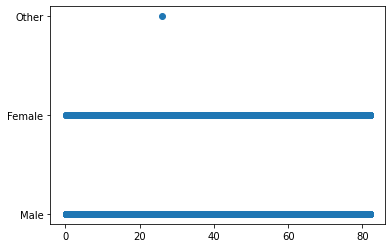

In [72]:
# Through scatter Plot
plt.scatter(data["age"], data["gender"])


gender
Female    2994
Male      2115
Other        1
dtype: int64


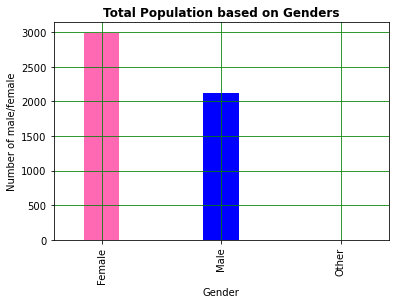

In [73]:
# Finding the Gender with number
dg=data.groupby(["gender"]).size()
print(dg)
# Drwaing the bar chart according to genders
#fig = plt.figure()
#fig.patch.set_facecolor('xkcd:light gray')
dg.plot(kind="bar", width=0.3, color=["hotpink", "blue", "black"])
plt.title("Total Population based on Genders", fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Number of male/female")
plt.grid(True, color='green')
plt.show()

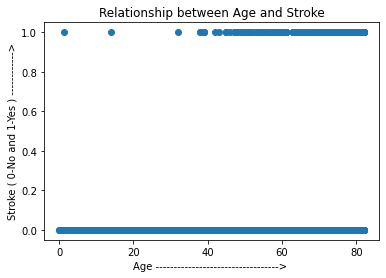

In [74]:
#group_data=pd.DataFrame(pd.qcut(data["age"], q= 10))
# Relationship through Scatter graph between age and stroke
plt.title("Relationship between Age and Stroke")
plt.xlabel("Age ----------------------------------> ")
plt.ylabel("Stroke ( 0-No and 1-Yes ) ------------>")
plt.scatter(data.age, data.stroke)

stroke
0    4861
1     249
dtype: int64


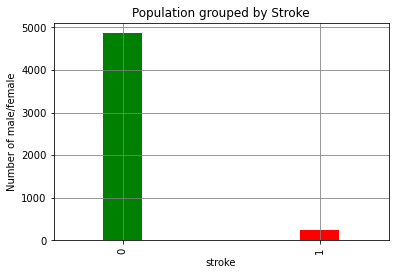

In [75]:
# Data for stroke
ds=data.groupby(["stroke"]).size()
print(ds)
# Graph for showing stroke
ds.plot(kind="bar", width=0.2, color=["Green", "Red"])
plt.title("Population grouped by Stroke")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()


age
(0, 15]      744
(15, 30]     826
(30, 45]    1048
(45, 60]    1188
(60, 75]     839
(75, 90]     465
dtype: int64


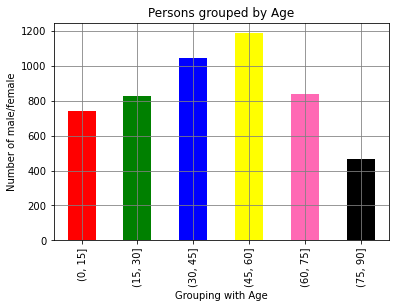

In [76]:
# Dividing the Age into intervals and drawing Bar chart
# group_data.groupby("age").size()
group_data = pd.DataFrame(pd.cut(data["age"], bins = [0, 15, 30, 45, 60 , 75 ,90 ]))
da=group_data.groupby("age").size()
print(da)
# Drawing the bar chart of age with intervals
da.plot(kind="bar", color=["red", "green", "blue", "yellow", "hotpink", "black"])
plt.title("Persons grouped by Age")
plt.xlabel("Grouping with Age")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
dtype: int64


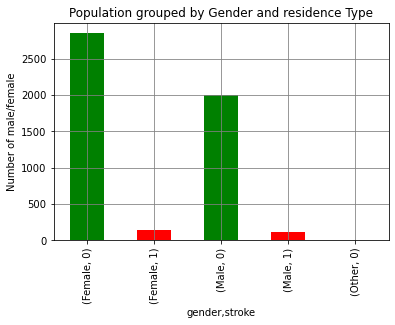

In [77]:
#Relationship between gender and stroke
dgs=data.groupby(["gender", "stroke"]).size()
print(dgs)
#bar Chart for relationship between gender and stroke
dgs.plot(kind="bar", width=0.5, color=["green", "red"])
plt.grid(True, color='grey')
plt.title("Population grouped by Gender and residence Type")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()


Residence_type
Rural    2514
Urban    2596
dtype: int64


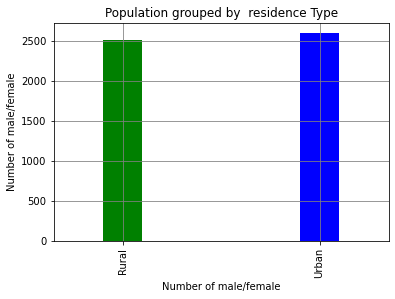

In [80]:
#Groupin the data by residence type
drt=data.groupby(["Residence_type"]).size()
print(drt)
# Data acoording to residence type
drt.plot(kind="bar", width=0.2, color=["green", "blue"])
plt.grid(True, color='grey')
plt.title("Population grouped by  residence Type")
plt.xlabel("Number of male/female")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()


Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
dtype: int64


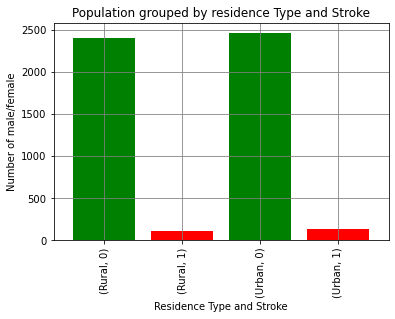

In [81]:
# Relationship with Residence and stroke
drts=data.groupby(["Residence_type", "stroke"]).size()
print(drts)
# Relationship with Residence and stroke
drts.plot(kind="bar", width=0.8, color=["Green", "Red"])
plt.title("Population grouped by residence Type and Stroke")
plt.xlabel("Residence Type and Stroke")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()


gender  Residence_type
Female  Rural             1465
        Urban             1529
Male    Rural             1048
        Urban             1067
Other   Rural                1
dtype: int64


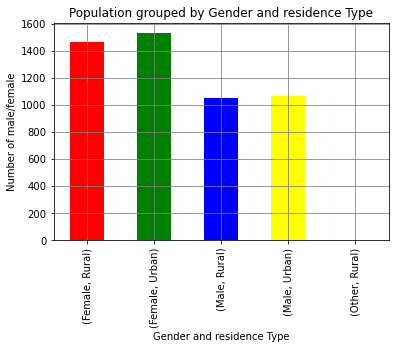

In [82]:
#Relationship between gender and residence type
dgrt=data.groupby(["gender", "Residence_type"]).size()
print(dgrt)
# Graph for showing relationship between gender and residence type
dgrt.plot(kind="bar", width=0.5, color=["red", "green", "blue", "yellow", "hotpink"])
plt.grid(True, color='grey')
plt.title("Population grouped by Gender and residence Type")
plt.xlabel("Gender and residence Type")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()


gender  Residence_type  stroke
Female  Rural           0         1401
                        1           64
        Urban           0         1452
                        1           77
Male    Rural           0          998
                        1           50
        Urban           0         1009
                        1           58
Other   Rural           0            1
dtype: int64


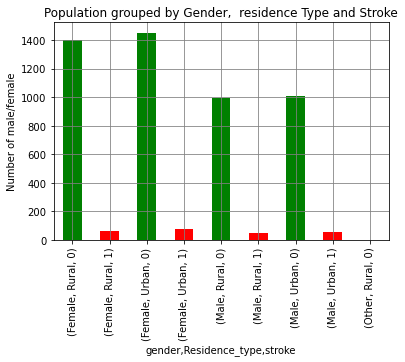

In [83]:
#Relationship between gender, residence type and stroke
dgrts=data.groupby(["gender", "Residence_type", "stroke"]).size()
print(dgrts)
#Graph for relationship between gender, residence type and stroke
dgrts.plot(kind="bar", width=0.5, color=["green", "red"])
plt.title("Population grouped by Gender,  residence Type and Stroke")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()


gender  Residence_type  work_type      stroke
Female  Rural           Govt_job       0         174
                                       1          10
                        Never_worked   0           2
                        Private        0         839
                                       1          34
                        Self-employed  0         220
                                       1          19
                        children       0         166
                                       1           1
        Urban           Govt_job       0         202
                                       1          13
                        Never_worked   0           9
                        Private        0         839
                                       1          42
                        Self-employed  0         244
                                       1          21
                        children       0         158
                                       1           1


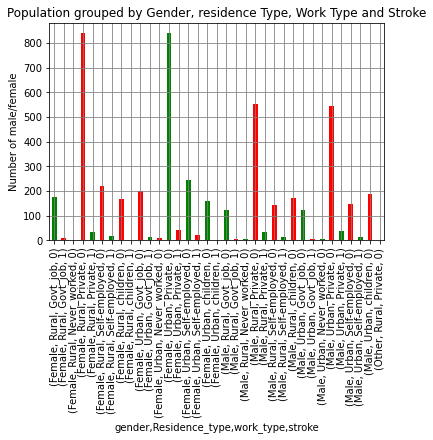

In [84]:
# Relationship between gender, residence type work type and stroke
dgrws=data.groupby(["gender", "Residence_type", "work_type", "stroke"]).size()
print(dgrws)
# Graph for relationship between gender, residence type work type and stroke
dgrws.plot(kind="bar", width=0.5 , color=["green", "red"])
plt.title("Population grouped by Gender, residence Type, Work Type and Stroke")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()


Text(0.5, 1.0, 'Age wise distribution of Females having heart strokes')

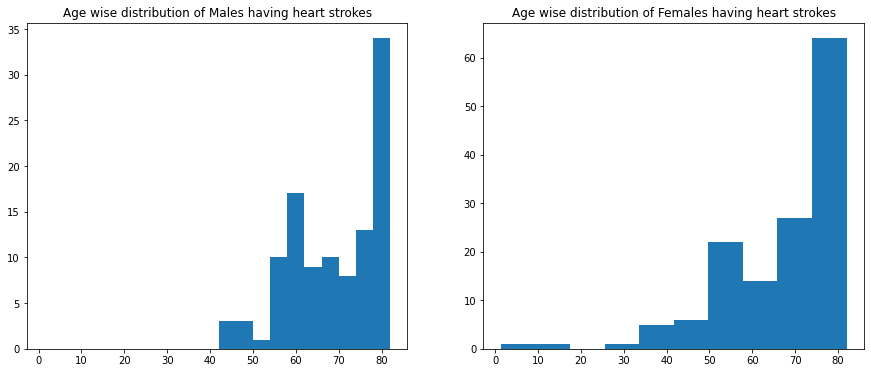

In [85]:
#Age wise distribution of Male/Female having Stroke. 
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,6))
ax[0].hist(data.query("stroke==1 & gender=='Male'")['age'])
ax[0].set_title('Age wise distribution of Males having heart strokes')
ax[1].hist(data.query("stroke==1 & gender=='Female'")['age'])
ax[1].set_title('Age wise distribution of Females having heart strokes')


Text(0.5, 1.0, 'Age wise distribution of Females having heart strokes with hypertension')

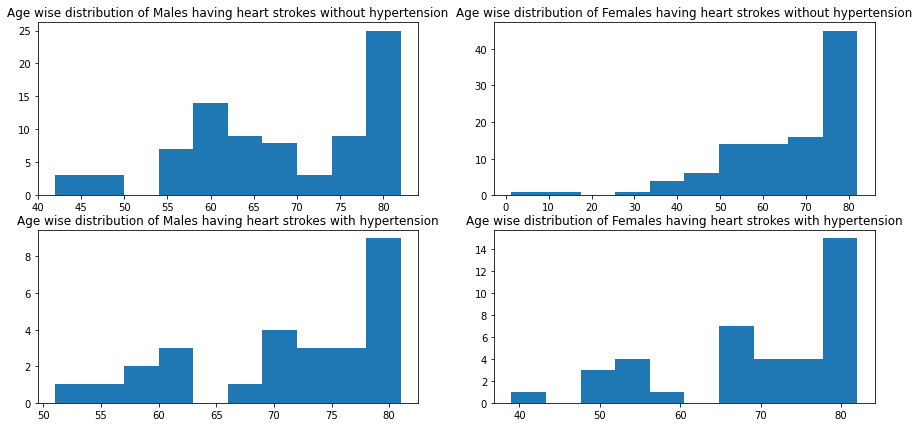

In [86]:
#Age wise distribution of Male/Female having Stroke with and without hypertension. 
fig, ax = plt.subplots(2, 2, figsize=(15,7))
ax[0,0].hist(data.query("stroke==1 & gender=='Male' & hypertension==0 ")['age'])
ax[0,0].set_title('Age wise distribution of Males having heart strokes without hypertension')
ax[0,1].hist(data.query("stroke==1 & gender=='Female' & hypertension==0 ")['age'])
ax[0,1].set_title('Age wise distribution of Females having heart strokes without hypertension')
ax[1,0].hist(data.query("stroke==1 & gender=='Male' & hypertension==1 ")['age'])
ax[1,0].set_title('Age wise distribution of Males having heart strokes with hypertension')
ax[1,1].hist(data.query("stroke==1 & gender=='Female' & hypertension==1 ")['age'])
ax[1,1].set_title('Age wise distribution of Females having heart strokes with hypertension')


Text(0.5, 1.0, 'Age wise distribution of Femles having strokes with hypertension Heart Diseases')

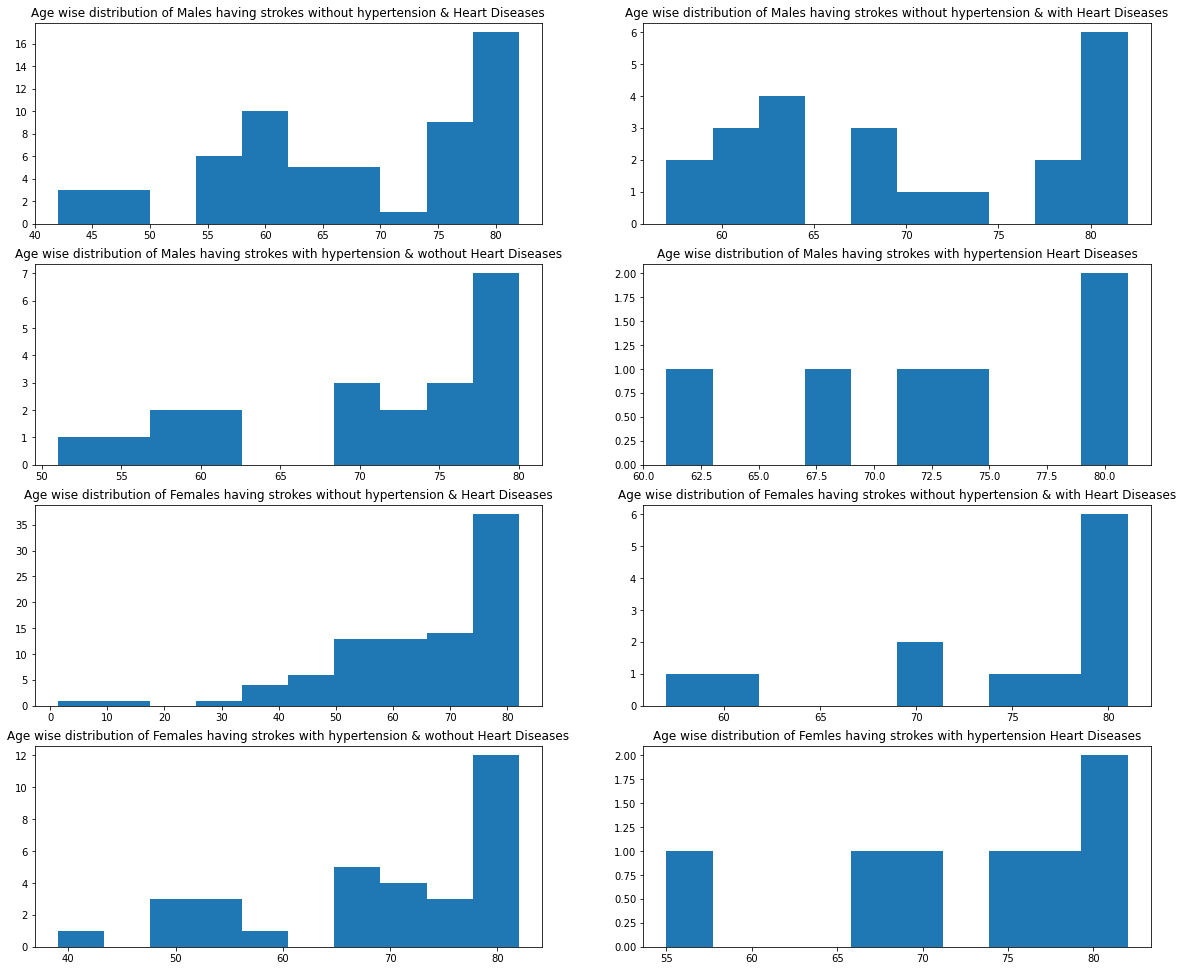

In [87]:
#Age wise distribution of heart stroke in Male/Female with and without hypertension and heart diseases. 
fig, ax = plt.subplots(4, 2, figsize=(20,17))
ax[0,0].hist(data.query("stroke==1 & gender=='Male' & hypertension==0 & heart_disease==0")['age'])
ax[0,0].set_title('Age wise distribution of Males having strokes without hypertension & Heart Diseases')
ax[0,1].hist(data.query("stroke==1 & gender=='Male' & hypertension==0 & heart_disease==1")['age'])
ax[0,1].set_title('Age wise distribution of Males having strokes without hypertension & with Heart Diseases')
ax[1,0].hist(data.query("stroke==1 & gender=='Male' & hypertension==1 & heart_disease==0")['age'])
ax[1,0].set_title('Age wise distribution of Males having strokes with hypertension & wothout Heart Diseases')
ax[1,1].hist(data.query("stroke==1 & gender=='Male' & hypertension==1 & heart_disease==1")['age'])
ax[1,1].set_title('Age wise distribution of Males having strokes with hypertension Heart Diseases')
ax[2,0].hist(data.query("stroke==1 & gender=='Female' & hypertension==0 & heart_disease==0")['age'])
ax[2,0].set_title('Age wise distribution of Females having strokes without hypertension & Heart Diseases')
ax[2,1].hist(data.query("stroke==1 & gender=='Female' & hypertension==0 & heart_disease==1")['age'])
ax[2,1].set_title('Age wise distribution of Females having strokes without hypertension & with Heart Diseases')
ax[3,0].hist(data.query("stroke==1 & gender=='Female' & hypertension==1 & heart_disease==0")['age'])
ax[3,0].set_title('Age wise distribution of Females having strokes with hypertension & wothout Heart Diseases')
ax[3,1].hist(data.query("stroke==1 & gender=='Female' & hypertension==1 & heart_disease==1")['age'])
ax[3,1].set_title('Age wise distribution of Femles having strokes with hypertension Heart Diseases')


(array([19.,  0.,  0., 34.,  0.,  0., 10.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

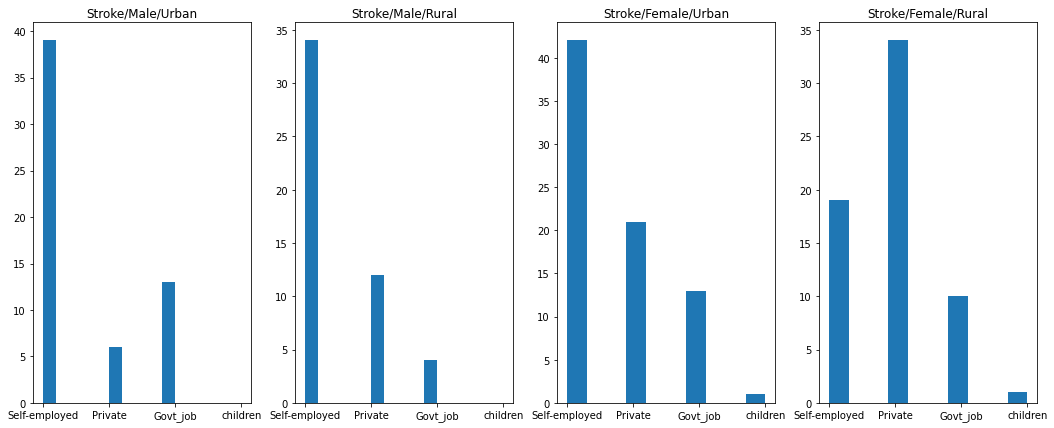

In [88]:
#Work type distribution of heart stroke in Male/Female respect to the work type
fig, ax = plt.subplots(1, 4, sharex=True, figsize=(18,7))
ax[0].set_title('Stroke/Male/Urban')
ax[0].hist(data.query("stroke==1 & gender=='Male' & Residence_type=='Urban'")['work_type'])
ax[1].set_title('Stroke/Male/Rural')
ax[1].hist(data.query("stroke==1 & gender=='Male' & Residence_type=='Rural'")['work_type'])
ax[2].set_title('Stroke/Female/Urban')
ax[2].hist(data.query("stroke==1 & gender=='Female' & Residence_type=='Urban'")['work_type'])
ax[3].set_title('Stroke/Female/Rural')
ax[3].hist(data.query("stroke==1 & gender=='Female' & Residence_type=='Rural'")['work_type'])


(array([55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

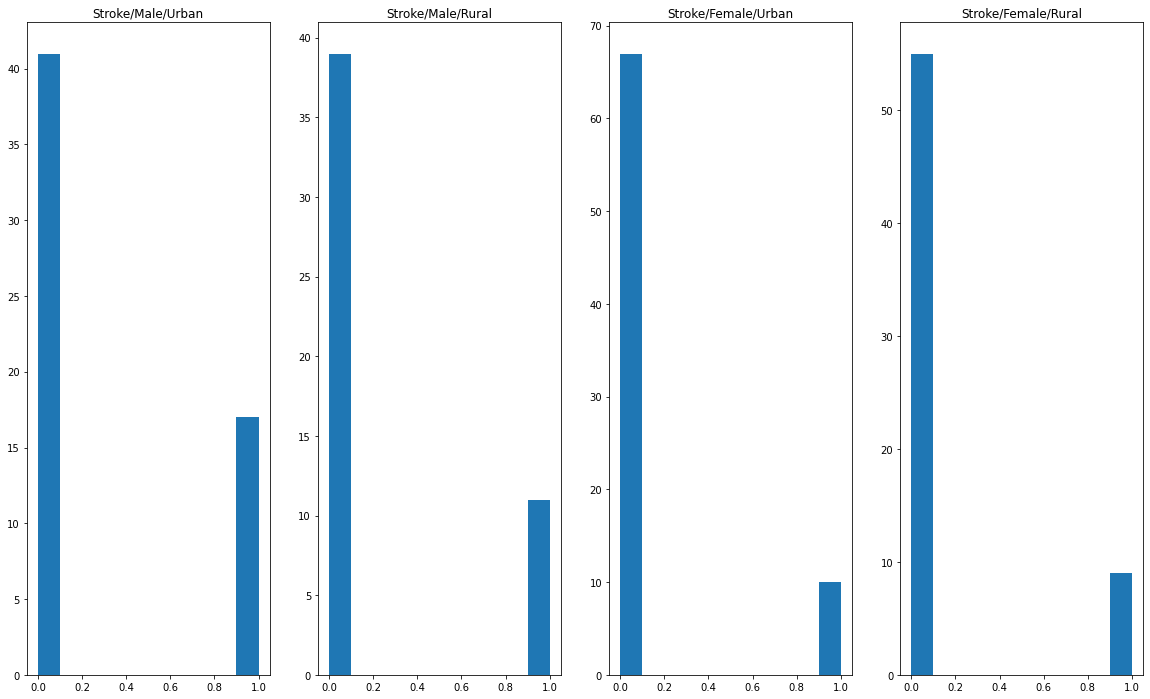

In [89]:
#Work type distribution of heart stroke in Male/Female respect to the residence type
fig, ax = plt.subplots(1, 4, sharex=True, figsize=(20,12))
ax[0].set_title('Stroke/Male/Urban')
ax[0].hist(data.query("stroke==1 & gender=='Male' & Residence_type=='Urban'")['heart_disease'])
ax[1].set_title('Stroke/Male/Rural')
ax[1].hist(data.query("stroke==1 & gender=='Male' & Residence_type=='Rural'")['heart_disease'])
ax[2].set_title('Stroke/Female/Urban')
ax[2].hist(data.query("stroke==1 & gender=='Female' & Residence_type=='Urban'")['heart_disease'])
ax[3].set_title('Stroke/Female/Rural')
ax[3].hist(data.query("stroke==1 & gender=='Female' & Residence_type=='Rural'")['heart_disease'])


In [90]:
plt.figure(figsize=(5,5))
sns.pairplot(data)
plt.show()


NameError: name 'sns' is not defined

<Figure size 360x360 with 0 Axes>

In [91]:
data.groupby(["ever_married"]).size()


ever_married
No     1757
Yes    3353
dtype: int64

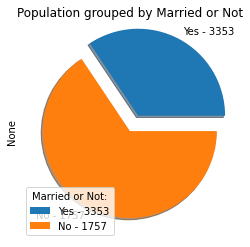

In [92]:
myexplode = [0.2, 0,]
mylabels = ["Yes - 3353", "No - 1757"]
data.groupby(["ever_married"]).size().plot(kind="pie", labels = mylabels, explode = myexplode, shadow = True)
plt.title("Population grouped by Married or Not")
plt.legend(title = "Married or Not:")
plt.show()


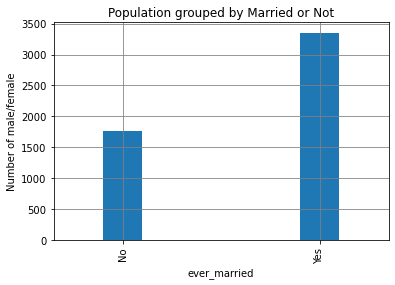

In [93]:
data.groupby(["ever_married"]).size().plot(kind="bar", width=0.2)
plt.title("Population grouped by Married or Not")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()

In [ ]:
data.groupby(["gender", "Residence_type", "work_type", "avg_glucose_level","stroke"]).size().plot(kind="bar", width=0.8)
plt.title("Population grouped by Gender, residence Type, Work Type, Average Glucose Level and Stroke")
plt.ylabel("Number of male/female")
plt.grid(True, color='grey')
plt.show()


In [ ]:
sns.pairplot(data)


In [ ]:
sns.histplot(data.age)


In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,7))
ax[0].hist(data.query("stroke==1 & gender=='Male'")['age'])
ax[0].set_title('Male Age wise distribution of heart strokes')
#ax[0].xlabel("Number of Males")
ax[1].hist(data.query("stroke==1 & gender=='Female'")['age'])
ax[1].set_title('Female Age wise distribution of heart strokes')

# Dataset Cleaning & Imputation

The present dataset has total 12 colums and 5110 rows. It is a highly imbalanced dataset having class sample ratio of 1:19. There are 7 columns in dataset having numerical values while 5 columns have categorical values (that need to be converted to the numerical values). There are 210 missing values in dataset (only bmi column has all these missing values). Since bmi is a numerical column, therefore, the missing values in this column can be replaced with mean of the column. 

In [ ]:
df=pd.read_csv("data.csv")

In [ ]:
# Print unique values from columns having categorical values
print("gender unique values")
print(df['gender'].unique())
print(df['gender'].astype('category').cat.categories)

print("ever_married unique values")
print(df['ever_married'].unique())
print(df['ever_married'].astype('category').cat.categories)

print("work_type unique values")
print(df['work_type'].unique())
print(df['work_type'].astype('category').cat.categories)

print("Residence_type unique values")
print(df['Residence_type'].unique())
print(df['Residence_type'].astype('category').cat.categories)

print("smoking_status unique values")
print(df['smoking_status'].unique())
print(df['smoking_status'].astype('category').cat.categories)

In [ ]:
# Drop the id column as it is insignificant for classification 
df=df.drop(columns='id',axis=1)

In [ ]:
len(df)

In [ ]:
# Fill the missing values
print("Missing values before:",df.isna().sum())
print("Average of BMI",df['bmi'].mean())

df['bmi'].fillna(value=df['bmi'].mean(),inplace=True)

print("Missing values after:",df.isna().sum())

#print(df.describe())
#df=df.dropna()
# Change the categorical values to numerical

In [ ]:
len(df)


In [ ]:
print(df['gender'].unique())
# Converting categorical values to numerical values
df['gender'] = df['gender'].astype('category')
df['ever_married'] = df['ever_married'].astype('category')
df['work_type'] = df['work_type'].astype('category')
df['Residence_type'] = df['Residence_type'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')
#df.dtypes
cat_columns = df.select_dtypes(['category']).columns

print(df.gender.unique())

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

# SMOTE to balance the imbalanced data

SMOTE stands for Synthetic Minority Oversampling Technique. It is a popular technique for balancing the imbalanced dataset. 

The current dataset is highly imbalanced. Class stroke=1 has just 5% representation in the dataset. The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

The imbalanced-learn library supports random undersampling via the RandomUnderSampler class. We can update the example to first oversample the minority class to have 40 percent the number of examples of the majority class, then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class.


In [ ]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [ ]:
# define dataset
arr=df.values
X=arr[:,0:10]
y=arr[:,10]

# summarize class distribution before SMOTE+Undersampling
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [ ]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
# Train test split with stratification. Here we take 30% samples for testing model

x_tr,x_val,y_tr,y_val=train_test_split(X,y,test_size=0.30,random_state=3,stratify=y)


# ML Models and Performance Metrics
Here, we create four machine learning models namley, SVC, KNN, Decision Tree, and GNB. The performance of each of these models has been calculated using folloing mertics:
1. Accuracy Score: A very simple performace metric to get the basic idea of the performance of the model. 
2. Classification Reprt: It gives the holostic idea of the performance of a model. It icludes precision, recall and f1-score as some of the important parameters. For a binary classification problem, more the f1-score, better the model is. 
3. Confusion Matrix: It gives an idea that how many instances of each class were misclassified and correctly classified. 

It is evident from the below results that SVC classifier performs best of all the models. Therefore, this model is chosen to act as an underlying model for the smart web application. 


In [ ]:
# SVC Classifier
classifier_svc=SVC(gamma='auto')
classifier_svc.fit(x_tr,y_tr)

# KNN Classifier
classifier_knn=KNeighborsClassifier()
classifier_knn.fit(x_tr,y_tr)

# Decision Tree
classifier_dtree=DecisionTreeClassifier()
classifier_dtree.fit(x_tr,y_tr)

# Gaussian Naive Bayes Classifier
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_tr,y_tr)

In [ ]:
pr_svc=classifier_svc.predict(x_val)
pr_knn=classifier_knn.predict(x_val)
pr_dtree=classifier_dtree.predict(x_val)
pr_gnb=classifier_gnb.predict(x_val)


In [ ]:
print("Accuracy of SVC:",accuracy_score(y_val,pr_svc)*100,"%")
print("Accuracy of KNN:",accuracy_score(y_val,pr_knn)*100,"%")
print("Accuracy of DTree:",accuracy_score(y_val,pr_dtree)*100,"%")
print("Accuracy of GNB:",accuracy_score(y_val,pr_gnb)*100,"%")

In [ ]:
# Other Accuracy Metrics
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

# Classification Reports
print("Classification Reports--------")
print("SVC:\n",classification_report(y_val,pr_svc))
print("KNN:\n",classification_report(y_val,pr_knn))
print("DTree:\n",classification_report(y_val,pr_dtree))
print("GNB:\n",classification_report(y_val,pr_gnb))

# Confusion Matrix for each model
print("Confusion Matrix--------")
print("SVC:\n",confusion_matrix(y_val,pr_svc))
print("KNN:\n",confusion_matrix(y_val,pr_knn))
print("DTree:\n",confusion_matrix(y_val,pr_dtree))
print("GNB:\n",confusion_matrix(y_val,pr_gnb))

In [ ]:
# Plotting the accuracy
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Accuracies of Different Classifiers on Stroke Dataset')
ax = fig.add_axes([0,0,1,1])
classifiers = ['SVC', 'KNN', 'DTree', 'GNB']
accu = [accuracy_score(pr_svc,y_val)*100,accuracy_score(pr_knn,y_val)*100,accuracy_score(pr_dtree,y_val)*100,accuracy_score(pr_gnb,y_val)*100]
ax.bar(classifiers,accu)
plt.show()

# Exporting the best model
SVC model has the best performance. Therefore, we will export it with joblib library to use in our web based application. 

In [ ]:
# Saving trained models
import pickle
import joblib

In [96]:
joblib.dump(classifier_svc,"model_svc.sav")

['model_svc.sav']

In [ ]:
# Checking the loaded model
loaded_model=joblib.load('model_svc.sav')
#print(loaded_model.score(x_val,y_val))
x=loaded_model.predict([[1,2,1,1,1,1,1,1,1,1]])
if(x):
    print("There are high chances of stroke based on the input values!!")
else:
    print("System does not predict an onset of Cardiac Stroke!!")